#EXERCISE 1 REINFORCEMENT LEARNING

Group members:

1. Feziwe Shongwe- 2135313
2. Suraksha Motilal- 2108903
3. Phola Bavuma- 1848739

**Please note:** Benji said that both the non-stationary and stationary formula is fine for use with these RL algorithms.

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. Implement a MAB:
- Let each arm give rewards from a Gaussian of variance 1, and
means drawn from a Gaussian of mean 0, variance 3 when they are
created.
- You should be able to “pull” an arm (select an action) and receive a
random reward.


In [2]:
# means drawn from gaussian of mean 0, variance 3

mu=0
variance=3
sigma= math.sqrt(variance)

distribution=s = np.random.normal(mu, sigma, 1000)
index = np.random.choice(distribution.shape[0], 10, replace=False) 
means=(distribution[index])
print('Means used:', means)




Means used: [-1.93762572  0.60690795 -1.36373835 -0.78931491 -1.88279816  0.4856792
 -0.34291241 -1.19145456 -0.34002005  0.37683668]


In [3]:
def plotArm(distribution, mu, sigma):
  count, bins, ignored = plt.hist(distribution, 30, density=True)
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
  plt.show()

In [4]:

variance=1
sigma= math.sqrt(variance)


distArm1=np.random.normal(means[0], sigma, 1000)
distArm2=np.random.normal(means[1], sigma, 1000)
distArm3=np.random.normal(means[2], sigma, 1000)
distArm4=np.random.normal(means[3], sigma, 1000)
distArm5=np.random.normal(means[4], sigma, 1000)
distArm6=np.random.normal(means[5], sigma, 1000)
distArm7=np.random.normal(means[6], sigma, 1000)
distArm8=np.random.normal(means[7], sigma, 1000)
distArm9=np.random.normal(means[8], sigma, 1000)
distArm10=np.random.normal(means[9], sigma, 1000)


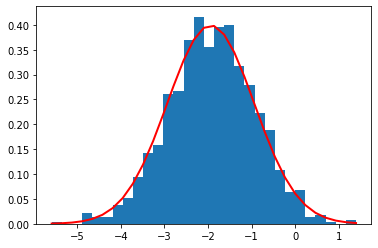

In [5]:
# plot arm 1
plotArm(distArm1, means[0], sigma)

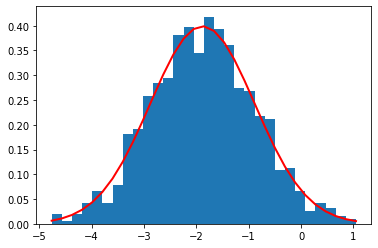

In [6]:
# plot arm 5
plotArm(distArm5, means[4], sigma)

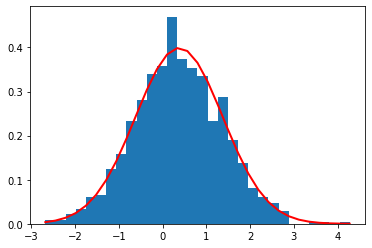

In [7]:
# plot arm 10
plotArm(distArm10, means[9], sigma)

2. Implement the 𝜖-greedy, greedy with optimistic initialisation, and UCB
algorithms.


𝜖-greedy- Feziwe

In [8]:
def e_greedy_selection(eps, alpha,n, a_arr,rewards):
  '''
  eps -> Epsilon
  n -> number of iterations
  a_arr -> actions' array
  reward -> Reward for each arm
  '''
  results = np.empty(n) 
  action_counter = np.zeros_like(a_arr)
  rewardArr=[]
#Starting the count from one to avoid division by zero (Exception:ZeroDivisionError)
  prev_reward = 0#Initial reward is 0
  for i in range(1,n):
    prob = np.random.random() #Random Probability
  
    if prob < eps: #Implies Exploring
      action = np.random.choice(len(a_arr)) #Random action from the actions
      action_counter[action]+=1

    else: #Greedy case/exploiting
      action= np.argmax(rewards) # maximum action for the step time
      action_counter[action]+=1
    
    #Updating the number of counts an arm was pulled
    current_reward = rewards[action]

    prev_reward = prev_reward + (alpha)*(current_reward- prev_reward)

    rewardArr.append(current_reward)

  avg_reward=[]
  for i in range(n):
    sum=0
    for j in range(i):
      sum=sum + rewardArr[j]
    avg_reward.append(sum/(i+1)) 
  return avg_reward



In [9]:
#Distribution of each arm
armDistributions = np.array([distArm1, distArm2, distArm3, distArm4, distArm5, distArm6, distArm7, distArm8, distArm9, distArm10])

#Rewards for each arm
e_armRewards = np.zeros((10,1))
arm_count = 0 #Arm count

for i in range(len(armDistributions)):
  index = np.random.choice(1000, 1, replace=False)
  e_armRewards[i]= armDistributions[arm_count][index]
  arm_count+=1 #arm count

#Initialising the actions and rewards with zeros
e_greedy_actions=np.zeros_like(e_armRewards) 

greedy with optimistic initialisation- Suraksha

In [10]:
# NOT DONE YET-> STILL NEED TO COMBINE THE GRAPHS ETC

def getReward(distArm):
  index = np.random.choice(1000, 1, replace=False) 
  return distArm[index]

def getArm(armNum):
  if (armNum==1):
    return distArm1;
  elif (armNum==2):
    return distArm2;
  elif (armNum==3):
    return distArm3;
  elif (armNum==4):
    return distArm4;
  elif (armNum==5):
    return distArm5;
  elif (armNum==6):
    return distArm6;
  elif (armNum==7):
    return distArm7;
  elif (armNum==8):
    return distArm8;
  elif (armNum==9):
    return distArm9;
  elif (armNum==10):
    return distArm10;


In [11]:
def OptimisticGreedyInitialisation(a, Q1,n, armNum, RewardsArr):
  # have to use non-stationary equation as rewards are not constant
  # get sum
  sum=0
  # get reward from specific distarm
  distArm=getArm(armNum)
  R=getReward(distArm)
  # add to running reward total
  RewardsArr.append(R)
  for i in range(1,n):
    # calculate sum part of formula

    #  KEEP RUNNING ARRAY OF R VALUES
    sum=sum+(a*(math.pow((1-a),(n-i)))*RewardsArr[i])


  Qn_1=(math.pow((1-a),n) )*Q1 + sum
  return Qn_1
  


In [12]:
# a is alpha
def performNonStationaryOptimisticGreedy(Q1, a, numIt):
  # initialise values to really high amounts to be optimistic


  # give all actions a value of Q1
  Q1=Q1*1.0
  actions=np.array([Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1])
  # get element index that has maximum val
  ind=(np.argmax(actions))
  # index is the arm with maximum rewards
  Q1=actions[ind]

  # array to store all the rewards in
  RewardsArr=[]

  # do numIt iterations
  for i in range(numIt):
    val=OptimisticGreedyInitialisation(a, Q1,i,ind+1,  RewardsArr)
    actions[ind]=val
    ind=(np.argmax(actions))


  # get Average Rewards over time

  AvgRewards=[]

  for i in range(numIt):
    sum=0
    for j in range(i):
      sum=sum+RewardsArr[j]
    
    AvgRewards.append(sum/(i+1))

  return AvgRewards



 UCB- Phola

In [13]:

def UCB(action,reward,c,n):

  action_counter = np.zeros_like(action) #Nₜ(a) is the number of times that action ‘a’ has been selected, prior to time ‘t’.
  action_counter[ action_counter== 0] = 1#float("inf")

  reward_action = np.zeros_like(action) # sum of rewards for a action
  rewardArr=[] #Array for storing the rewards for each time step
  Q_t = np.zeros_like(action) #Qₜ(a) is the estimated value of action ‘a’ at time step ‘t’.
  #Q_t[ Q_t== 0] = 1


  for t in range(1,n+1):

    explore= c*(np.sqrt(np.log(t)/action_counter))
    summation = Q_t + explore #Where Q_t is exploitation
    action_index =np.argmax(summation) #Aₜ

    action_counter[action_index]+=1 #Incrementing the action counter
      
    rewardArr.append(reward[action_index]) #Appending the rewards for each iteration

    reward_action[action_index] += reward[action_index] #Incrementing the reward for a specific action
    Q_t[action_index] = (reward_action[action_index]/action_counter[action_index])


  AvgRewards=[]

  for i in range(n):
    sum=0
    for j in range(i):
      sum=sum+rewardArr[j]

    AvgRewards.append(sum/(i+1))
  return AvgRewards


In [14]:
#Distribution of each arm
armDistributions = np.array([distArm1, distArm2, distArm3, distArm4, distArm5, distArm6, distArm7, distArm8, distArm9, distArm10])

#Rewards for each arm
armRewards = np.zeros((10,1))
arm_count = 0 #Arm count

for i in range(len(armDistributions)):
  index = np.random.choice(1000, 1, replace=False)
  armRewards[i]= armDistributions[arm_count][index]
  arm_count+=1 #arm count


#Initialising the actions and rewards with zeros
ucb_actions=np.zeros_like(armRewards) 
Q1 = np.zeros_like(armRewards) 


3. Run the three algorithms with different parameter settings on a 10-arm
bandit (see next section).

# By next week’s lecture, submit on Moodle:
1. A plot of reward over time (averaged over 100 runs each) on the same 
axes, for 𝜖-greedy with 𝜖 = 0.1, greedy with 𝑄1 = 5, and UCB with 𝑐 = 2

Steps:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,

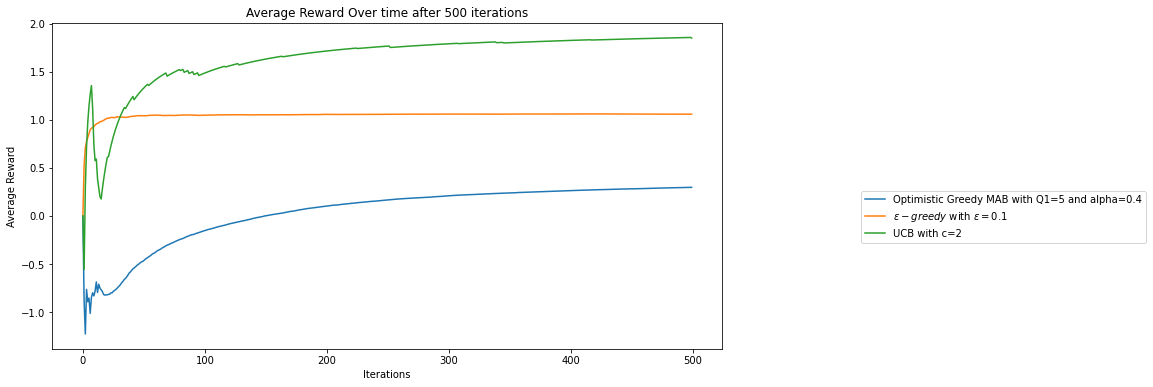

In [15]:
# get average reward over 100 runs (did 500 iterations):
numIt=500


# YOU WILL USE THESE VARIABLES
sumAvgRewardsEGreedy=np.zeros(numIt)
sumAvgRewardsOptGreedy=np.zeros(numIt)
sumAvgRewardsUCB=np.zeros(numIt)


print('Steps:',end='')
for i in range(100):
  print(i,end=',')
  sumAvgRewardsOptGreedy=np.add(sumAvgRewardsOptGreedy, performNonStationaryOptimisticGreedy(5,0.4,numIt))
  sumAvgRewardsEGreedy = np.add(sumAvgRewardsEGreedy, e_greedy_selection(eps = 0.1, alpha=0.5,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards))
  sumAvgRewardsUCB = np.add(sumAvgRewardsUCB,UCB(action=ucb_actions,reward= armRewards,c=2,n=numIt))

  # ============

# get the average over 100 runs
sumAvgRewardsOptGreedy=(sumAvgRewardsOptGreedy/100)
sumAvgRewardsEGreedy=(sumAvgRewardsEGreedy/100)
sumAvgRewardsUCB=(sumAvgRewardsUCB/100)

# plot avg reward over time

plt.figure(figsize=(12,6))
plt.plot(sumAvgRewardsOptGreedy, label="Optimistic Greedy MAB with Q1=5 and alpha=0.4")

# UNCOMMENT THESE WHEN DONE:
plt.plot(sumAvgRewardsEGreedy, label="$\epsilon-greedy$ with $\epsilon=0.1$")
plt.plot(sumAvgRewardsUCB, label="UCB with c=2")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward Over time after "+str(numIt)+" iterations" )
plt.show()


2. A summary comparison plot of rewards over first 1000 steps for the three 
algorithms with different values of the hyperparameters

E-GREEDY

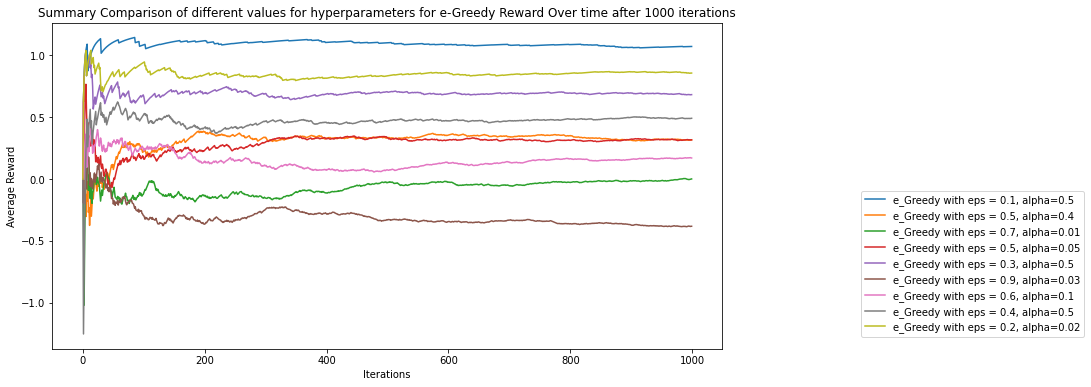

In [16]:
# summary comparison plot of rewards over time with different values of hyperparameters 
# OPTIMISTIC GREEDY
numIt=1000

# eps = 0.1 a=0.5, numit=1000
e_Greedy1=e_greedy_selection(eps = 0.1, alpha=0.5,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.5, a=0.4, numit=1000
e_Greedy2=e_greedy_selection(eps = 0.5, alpha=0.4,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.7, a=0.5, numit=1000
e_Greedy3=e_greedy_selection(eps = 0.7, alpha=0.01,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.1, numit=1000
e_Greedy4=e_greedy_selection(eps = 0.5, alpha=0.05,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.1, numit=1000
e_Greedy5=e_greedy_selection(eps = 0.3, alpha=0.5,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.1, numit=1000
e_Greedy6=e_greedy_selection(eps = 0.9, alpha=0.03,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.7, numit=1000
e_Greedy7=e_greedy_selection(eps = 0.6, alpha=0.1,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.7, numit=1000
e_Greedy8=e_greedy_selection(eps = 0.4, alpha=0.5,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)
# eps = 0.1, a=0.7, numit=1000
e_Greedy9=e_greedy_selection(eps = 0.2, alpha=0.02,n=numIt, a_arr=e_greedy_actions,rewards=e_armRewards)

# plot all of them
plt.figure(figsize=(12,6))
plt.plot(e_Greedy1, label="e_Greedy with eps = 0.1, alpha=0.5")
plt.plot(e_Greedy2, label="e_Greedy with eps = 0.5, alpha=0.4")
plt.plot(e_Greedy3, label="e_Greedy with eps = 0.7, alpha=0.01")
plt.plot(e_Greedy4, label="e_Greedy with eps = 0.5, alpha=0.05")
plt.plot(e_Greedy5, label="e_Greedy with eps = 0.3, alpha=0.5")
plt.plot(e_Greedy6, label="e_Greedy with eps = 0.9, alpha=0.03")
plt.plot(e_Greedy7, label="e_Greedy with eps = 0.6, alpha=0.1")
plt.plot(e_Greedy8, label="e_Greedy with eps = 0.4, alpha=0.5")
plt.plot(e_Greedy9, label="e_Greedy with eps = 0.2, alpha=0.02")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Summary Comparison of different values for hyperparameters for e-Greedy Reward Over time after "+str(numIt)+" iterations" )
plt.show()

OPTIMISTIC GREEDY

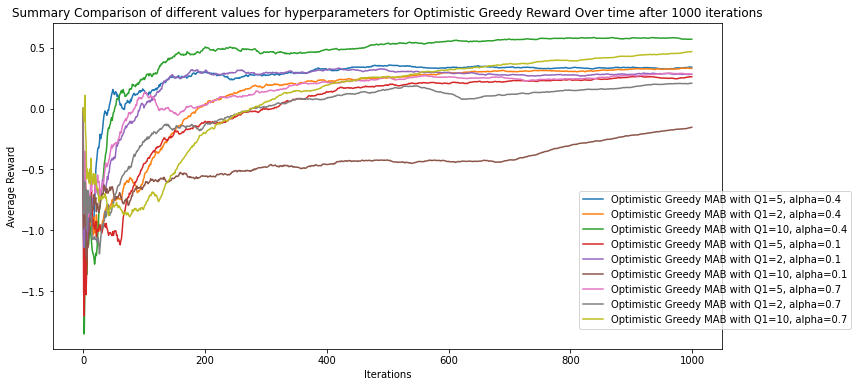

In [17]:
# summary comparison plot of rewards over time with different values of hyperparameters 
# OPTIMISTIC GREEDY
numIt=1000
# q1=5, a=0.4, numit=1000
optGreedy1=performNonStationaryOptimisticGreedy(5,0.4,numIt)
# q1=2, a=0.4, numit=1000
optGreedy2=performNonStationaryOptimisticGreedy(2,0.4,numIt)
# q1=10, a=0.4, numit=1000
optGreedy3=performNonStationaryOptimisticGreedy(10,0.4,numIt)
# q1=5, a=0.1, numit=1000
optGreedy4=performNonStationaryOptimisticGreedy(5,0.1,numIt)
# q1=2, a=0.1, numit=1000
optGreedy5=performNonStationaryOptimisticGreedy(2,0.1,numIt)
# q1=10, a=0.1, numit=1000
optGreedy6=performNonStationaryOptimisticGreedy(10,0.1,numIt)
# q1=5, a=0.7, numit=1000
optGreedy7=performNonStationaryOptimisticGreedy(5,0.7,numIt)
# q1=2, a=0.7, numit=1000
optGreedy8=performNonStationaryOptimisticGreedy(2,0.7,numIt)
# q1=10, a=0.7, numit=1000
optGreedy9=performNonStationaryOptimisticGreedy(10,0.7,numIt)

# plot all of them
plt.figure(figsize=(12,6))
plt.plot(optGreedy1, label="Optimistic Greedy MAB with Q1=5, alpha=0.4")
plt.plot(optGreedy2, label="Optimistic Greedy MAB with Q1=2, alpha=0.4")
plt.plot(optGreedy3, label="Optimistic Greedy MAB with Q1=10, alpha=0.4")
plt.plot(optGreedy4, label="Optimistic Greedy MAB with Q1=5, alpha=0.1")
plt.plot(optGreedy5, label="Optimistic Greedy MAB with Q1=2, alpha=0.1")
plt.plot(optGreedy6, label="Optimistic Greedy MAB with Q1=10, alpha=0.1")
plt.plot(optGreedy7, label="Optimistic Greedy MAB with Q1=5, alpha=0.7")
plt.plot(optGreedy8, label="Optimistic Greedy MAB with Q1=2, alpha=0.7")
plt.plot(optGreedy9, label="Optimistic Greedy MAB with Q1=10, alpha=0.7")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Summary Comparison of different values for hyperparameters for Optimistic Greedy Reward Over time after "+str(numIt)+" iterations" )
plt.show()

UCB

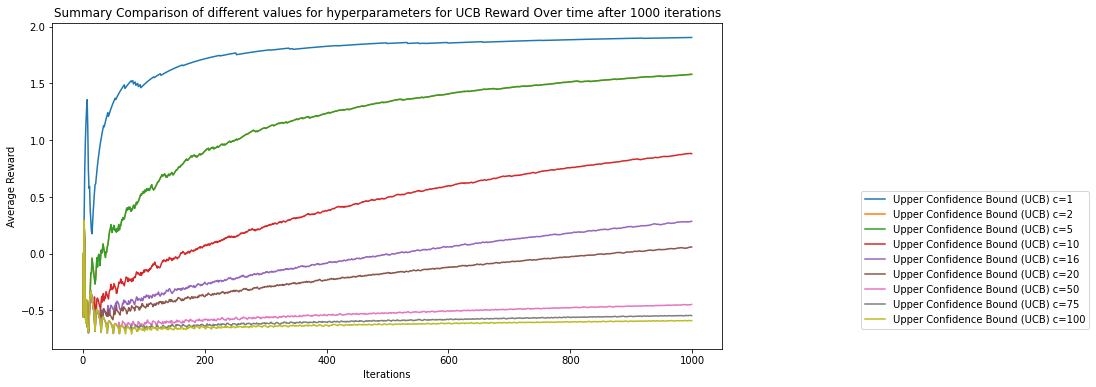

In [18]:
# summary comparison plot of rewards over time with different values of hyperparameters 
# OPTIMISTIC GREEDY
numIt=1000


# c=1, numit=1000
UCB_1=UCB(action=ucb_actions,reward= armRewards,c=2,n=numIt)
# c=2, numit=1000
UCB_2=UCB(action=ucb_actions,reward= armRewards,c=5,n=numIt)
# c=5, numit=1000
UCB_3=UCB(action=ucb_actions,reward= armRewards,c=5,n=numIt)
# c=10, numit=1000
UCB_4=UCB(action=ucb_actions,reward= armRewards,c=10,n=numIt)
# c=16, numit=1000
UCB_5=UCB(action=ucb_actions,reward= armRewards,c=16,n=numIt)
# c=20, numit=1000
UCB_6=UCB(action=ucb_actions,reward= armRewards,c=20,n=numIt)
# c=50, numit=1000
UCB_7=UCB(action=ucb_actions,reward= armRewards,c=50,n=numIt)
# c=75, numit=1000
UCB_8=UCB(action=ucb_actions,reward= armRewards,c=75,n=numIt)
# c=100, numit=1000
UCB_9=UCB(action=ucb_actions,reward= armRewards,c=100,n=numIt)

# plot all of them
plt.figure(figsize=(12,6))
plt.plot(UCB_1, label="Upper Confidence Bound (UCB) c=1")
plt.plot(UCB_2, label="Upper Confidence Bound (UCB) c=2")
plt.plot(UCB_3, label="Upper Confidence Bound (UCB) c=5")
plt.plot(UCB_4, label="Upper Confidence Bound (UCB) c=10")
plt.plot(UCB_5, label="Upper Confidence Bound (UCB) c=16")
plt.plot(UCB_6, label="Upper Confidence Bound (UCB) c=20")
plt.plot(UCB_7, label="Upper Confidence Bound (UCB) c=50")
plt.plot(UCB_8, label="Upper Confidence Bound (UCB) c=75")
plt.plot(UCB_9, label="Upper Confidence Bound (UCB) c=100")

plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Summary Comparison of different values for hyperparameters for UCB Reward Over time after "+str(numIt)+" iterations" )
plt.show()